<a href="https://colab.research.google.com/github/aryanma11ick/ImageClassifier_v1/blob/main/ImageClassifier_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing the dependencies and Setup


In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
!pip list


Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

# Filtering Images (Cleaning up Data)


In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/Projects/ImageClassifier_v1/data'

In [ ]:
#listing all the images in 'dogs' directory
os.listdir(os.path.join(data_dir, 'dogs'))

['image17.jpeg',
 'image21.jpeg',
 'image38.jpeg',
 'image41.jpeg',
 'image24.jpeg',
 'image32.jpeg',
 'image18.jpeg',
 'image34.jpeg',
 'image31.jpeg',
 'image33.jpeg',
 'image22.jpeg',
 'image25.jpeg',
 'uttar-pradesh-bans-ferocious-dogs-a-deep-dive-into-all-23-breeds-011155322-16x9_0.jpeg',
 'golden-retriever-puppy.jpg',
 'Science-Life-Extension-Drug-for-Big-Dogs-Is-Getting-Closer-1330545769.jpg',
 'angry_chihuahua.png',
 'ASHH5bDmsp6wnK6mEfZdcU-1200-80.jpg',
 'Small-dogs-960x640.jpg',
 'bernese-mountain-dog.jpg',
 'National-Dog-Day--960x640.jpg',
 'small-fluffy-dog-breeds-shih-tzu-1622652006.jpg',
 'maltese-portrait.jpg',
 'Dogs-improve-concentration-creativity.jpg',
 'small-fluffy-dog-breeds-maltipoo-66300ad363389.jpg',
 'b4acd613-b4b0-42bd-bdfe-89fc55985608.jpeg',
 'RF2303H_65658992e7bc6_3600.jpg',
 'zoo-dyes-dogs-pandas-zz-240510-bd58fd.jpg',
 '220805-border-collie-play-mn-1100-82d2f1.jpg',
 '1655430860853.jpeg',
 'small-dogs-toy-poodle-1563780396.jpg',
 'worlds-smallest-dogs-16

In [ ]:
img = cv2.imread(os.path.join(data_dir, 'cats', '139808.jpg'))

In [ ]:
img.shape

(4000, 6000, 3)

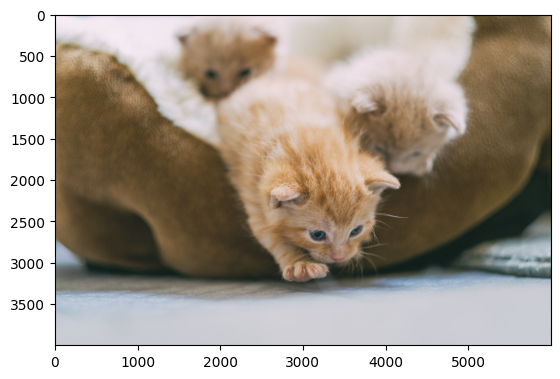

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))


#Loading Data(Data Pipeline)

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 158 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
batch = data_iterator.next()

In [ ]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
#Class_0 = Cats
#Class_1 = Dogs
batch[1]

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

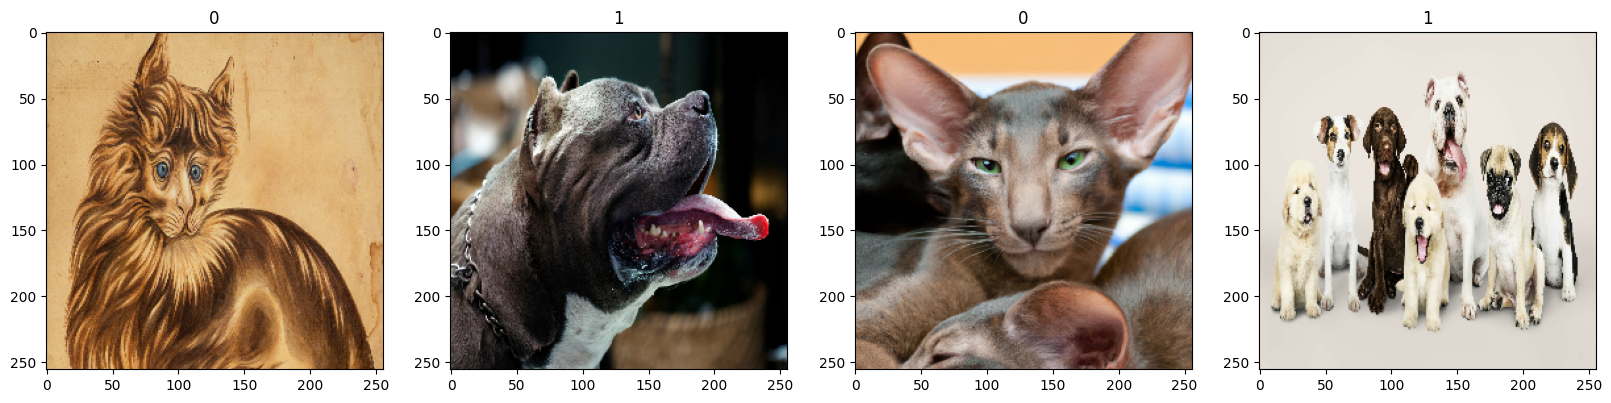

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

#Preprocessing the Data


Scaling the data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].min()

0.0

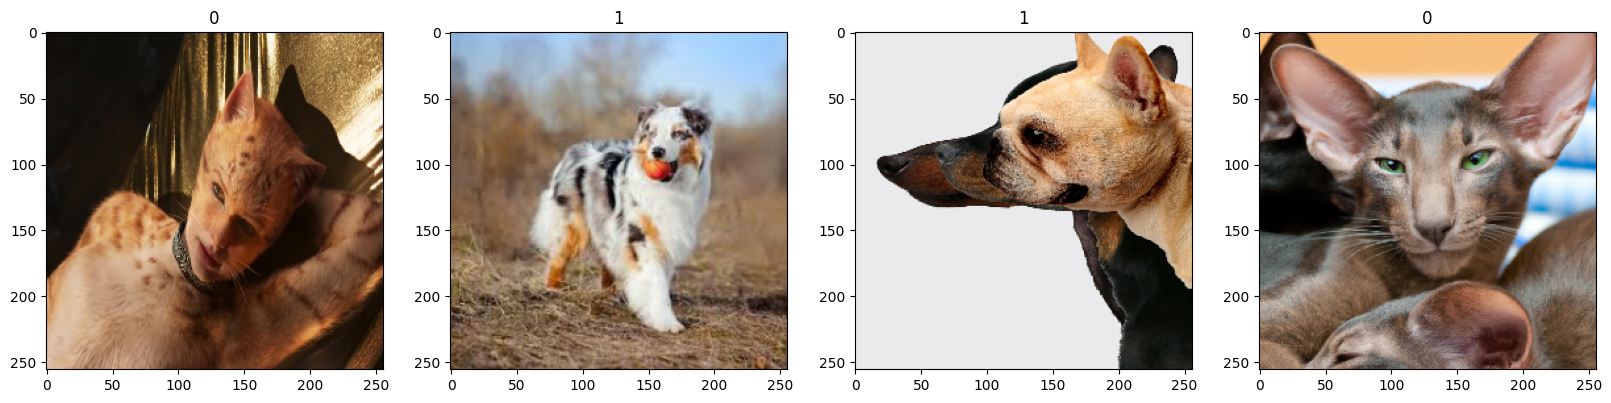

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

Splitting the Data

In [ ]:
len(data)

5

In [ ]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [ ]:
train_size+val_size+test_size

5

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(test)

1

#Deep Model


Build Deep Learning Method

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir = '/content/drive/MyDrive/Projects/ImageClassifier_v1/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train, epochs = 30, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/30
3/3 [==============================] - 10s 3s/step - loss: 0.3700 - accuracy: 0.8438 - val_loss: 0.3815 - val_accuracy: 0.7812
Epoch 2/30
3/3 [==============================] - 9s 3s/step - loss: 0.3138 - accuracy: 0.8646 - val_loss: 0.2513 - val_accuracy: 0.9375
Epoch 3/30
3/3 [==============================] - 8s 2s/step - loss: 0.2197 - accuracy: 0.9688 - val_loss: 0.2668 - val_accuracy: 0.8750
Epoch 4/30
3/3 [==============================] - 14s 5s/step - loss: 0.1924 - accuracy: 0.9375 - val_loss: 0.2049 - val_accuracy: 0.9375
Epoch 5/30
3/3 [==============================] - 9s 3s/step - loss: 0.1983 - accuracy: 0.9271 - val_loss: 0.1844 - val_accuracy: 0.9688
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 0.1810 - accuracy: 0.9479 - val_loss: 0.1733 - val_accuracy: 0.9375
Epoch 7/30
3/3 [==============================] - 9s 2s/step - loss: 0.1333 - accuracy: 0.9896 - val_loss: 0.2496 - val_accuracy: 0.8750
Epoch 8/30
3/3 [=======================

Plot Performance

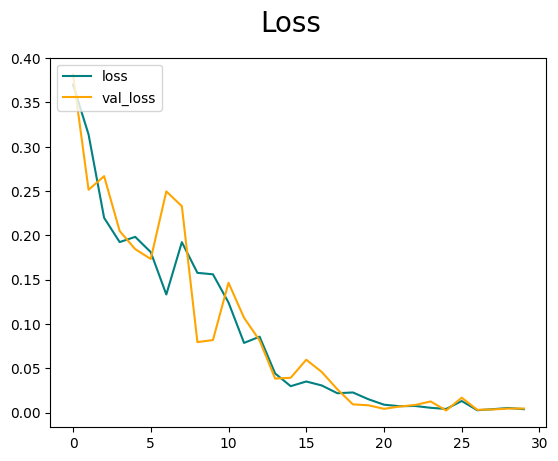

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

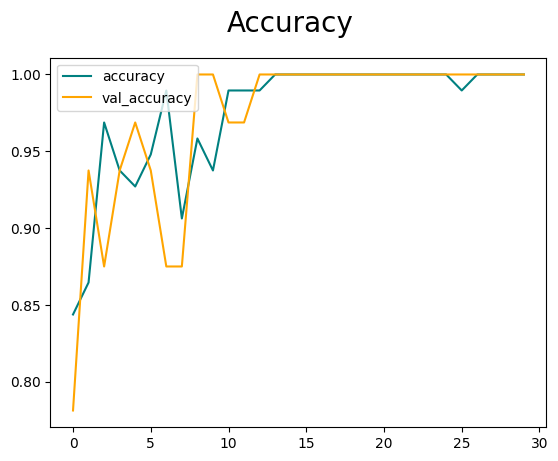

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

Evaluate Performance

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 1s 574ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


#Test Data

In [ ]:
import cv2

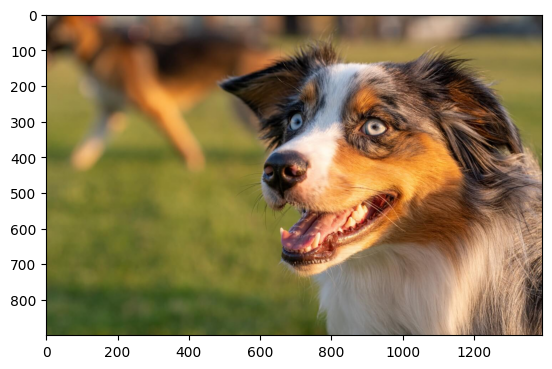

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Projects/ImageClassifier_v1/test_data/dog.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

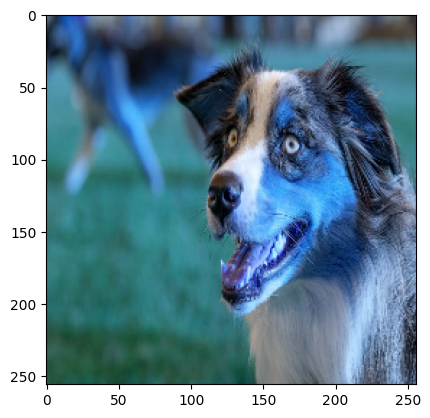

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
  print('dog')
else:
  print('cat')

1/1 [==============================] - 0s 19ms/step
dog


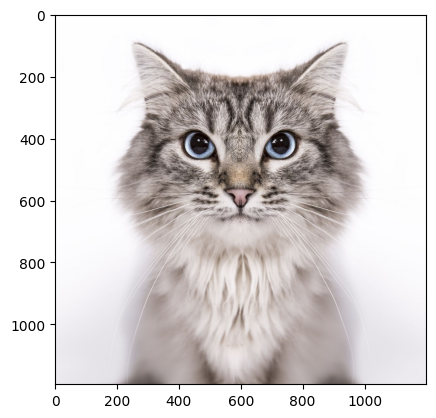

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Projects/ImageClassifier_v1/test_data/cat.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

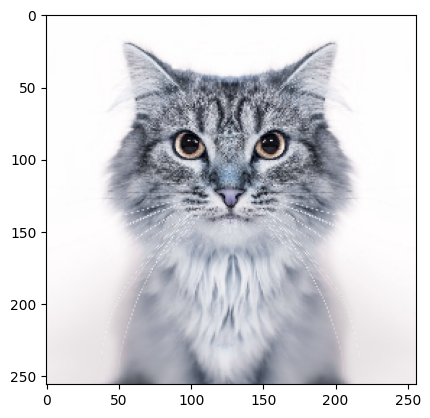

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)
if yhat < 0.5:
  print('Cat')
else:
  print('Dog')

1/1 [==============================] - 0s 19ms/step
[[0.00017556]]
Cat
